In [2]:
from __future__ import division
import os,sys
import collections
import numpy as np
import networkx as nx
from scipy import linalg
#import community
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.metrics.pairwise import cosine_similarity
#import seaborn as sns
#sns.set()
#sns.set_style("white")
#sns.set_style("ticks")
#sns.set_context("paper")

In [5]:
G1 = nx.read_adjlist("karate.adjlist")
L = nx.adjacency_matrix(G1, nodelist=G1.nodes(), weight='weight')
A = L.todense()
#np.save("Karate.npy", A)
G = nx.from_numpy_matrix(A)
print (A.shape)

(34, 34)


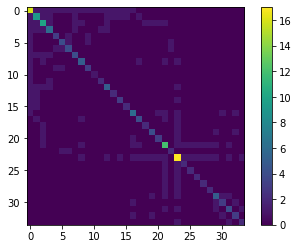

In [9]:
D = dict(G.degree(nbunch=None, weight=None))
#D = np.diag(list(Degree.values()))
L = np.diag(list(D.values()))+A
A = L
plt.imshow(A, interpolation = "nearest")
plt.colorbar()

In [10]:
# list(D.values())

In [11]:
def det_subset_selection(A, ERS, q):
    V_bar = ERS[:, 0:q]  # ERS stands for Eigen vector of right subspace
    _, _, P = linalg.qr(V_bar.T, mode = 'economic', pivoting = True)
    #print len(P)
    A_new = A[:, P]
    #print A_new.shape
    A_new_q = A_new[:, 0:q]
    #print A_new_q.shape
    UA_nq, SigA_nq, VA_nq = linalg.svd(A_new_q, full_matrices = False)
    return UA_nq, SigA_nq, A_new_q, A_new, P

In [12]:
def k_reduced_matrix(eig_val, eig_vec, k):
    e = np.diag(eig_val)
    v_red = eig_vec[:, 0:k]
    e_red = e[0:k, 0:k]
    ve = np.dot(v_red,e_red)
    return ve  

In [13]:
def cos_similarity(ve):
    Z = np.zeros((ve.shape[0], ve.shape[0]))
    for i in range(ve.shape[0]):
        x = ve[i]
        for j in range(ve.shape[0]):
            y = ve[j]
            a = list(x.real)
            b = list(y.real)
            z = cosine_similarity([a, b])[0][1]
            Z[i][j] = z
    return Z   

In [14]:
##Reorder matrices
def reordered_matrix(B):
    a = B
    fir_col = a[:, 0]
    idx1 = np.argsort(fir_col)
    idx1_descend = idx1[::-1]
    A_new = B[:, idx1_descend]
    A_CO = A_new
    A_RO = A_CO[idx1_descend, :]
    return A_RO,idx1_descend

In [15]:
#return sorted eigenvalues and eigenvectors
def return_sorted_wv(w,v):
    idx = np.argsort(w)
    idx2 = idx[::-1]  #descending order
    sorted_eigvals = w[idx2]
    v_sorted = v[:, idx2]
    return sorted_eigvals, v_sorted
#plt.scatter(range(len(sorted_eigvals)), sorted_eigvals)

In [16]:
q = 20
U_A, sig_A, V_A = linalg.svd(A, full_matrices = False)
sigma_A = linalg.diagsvd(sig_A, len(sig_A), len(sig_A))

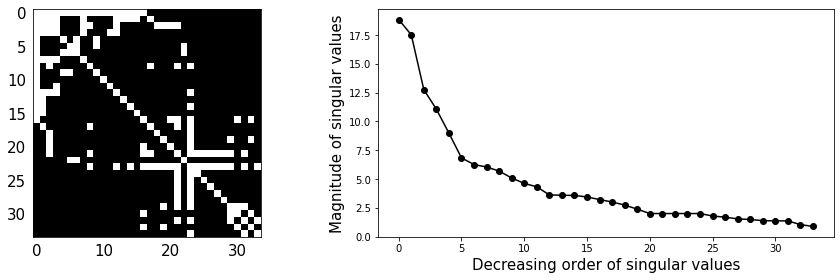

In [17]:
# plt.figure(figsize = (15,4))
# plt.subplot(121)
# plt.imshow(A, interpolation = "nearest", cmap = "gray")
# plt.subplot(122)
# plt.subplot(122)
f = plt.figure(figsize=(13,4))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
idx = np.nonzero(A)
A_bin = A
A_bin[idx] = 1 
# A_binary = np.zeros((A.shape[0], A.shape[1]))
# for i in range(A.shape[0]):
#     for j in range(A.shape[1]):
#         if (A[i][j] > 0):
#             A_binary[i][j] = 1
            
ax.imshow(A_bin, interpolation = "nearest", cmap = "gray")
ax2.plot(sig_A, "-o", color = "k")
ax2.set_xlabel("Decreasing order of singular values", fontsize = 15)
ax2.set_ylabel("Magnitude of singular values", fontsize = 15)
ax.tick_params(labelsize = 15, bottom=False,top=False, left=False,right=False)
plt.tight_layout()
plt.savefig("Community_fig1.png", dpi = 300)

In [19]:
#print sigma_A.shape

In [20]:
sigma_Aq = sigma_A[0:q, 0:q]
#print sigma_Aq.shape

In [21]:
UA_nq, SigA_nq, A_new_q, A_new, P1 = det_subset_selection(A, V_A.T, q)
L1 = A_new_q

In [23]:
V_Aq = V_A[0:q, :]
U_Aq = U_A[:, 0:q]
Coeff = np.dot(V_Aq.T, sigma_Aq)
Coeff_n = Coeff.T[:, P1]
Perm_Coeff = Coeff_n.T
#print Perm_Coeff.shape
A1_tilde = np.dot(Perm_Coeff, U_Aq.T)
#print A1_tilde.shape
A1_tilde_q = A1_tilde[0:q, :]
#print A1_tilde_q.shape
L1_appx = A1_tilde_q.T

In [25]:
print (linalg.norm(L1, 'fro'))
print (linalg.norm(L1_appx, 'fro'))

12.12435565298214
35.661824314229925


In [26]:
#clustering using L
w, v = linalg.eig(L)
w_L, v_L = return_sorted_wv(w,v)
k = 2
ve = k_reduced_matrix(w_L, v_L, k)
print (ve.shape)
c12, P12 = reordered_matrix(cos_similarity(ve))
# plt.figure()
# x_ticks = [str(x) for x in P21]
# plt.imshow(c1, interpolation = "nearest",cmap = "gray")
# plt.yticks(range(len(x_ticks)),x_ticks)
# plt.xticks(range(len(x_ticks)),x_ticks)
# plt.colorbar()

(34, 2)


In [27]:
w, v = linalg.eig(L)
w_L, v_L = return_sorted_wv(w,v)
k = 6
ve = k_reduced_matrix(w_L, v_L, k)
print (ve.shape)
c16, P16 = reordered_matrix(cos_similarity(ve))

(34, 6)


In [28]:
w, v = linalg.eig(L)
w_L, v_L = return_sorted_wv(w,v)
k = 20
ve = k_reduced_matrix(w_L, v_L, k)
print (ve.shape)
c134, P134 = reordered_matrix(cos_similarity(ve))

(34, 20)


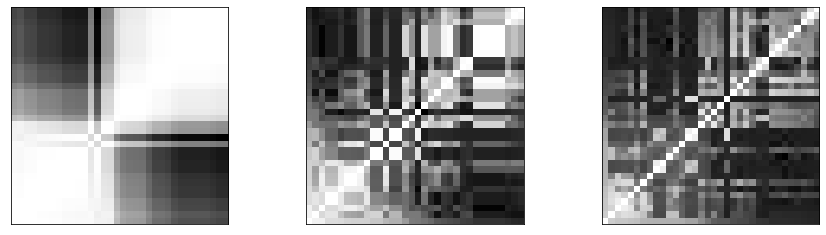

In [29]:
f = plt.figure(figsize=(15,4))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
x_ticks = [str(x) for x in P12]
ax.imshow(c12, interpolation = "nearest",cmap = "gray", origin = "lower")
ax.set_xticks([])
ax.set_yticks([])

#ax.set_yticklabels(x_ticks)
#ax.set_xticklabels(x_ticks)

x_ticks = [str(x) for x in P16]
ax2.imshow(c16, interpolation = "nearest",cmap = "gray",origin = "lower")
ax2.set_xticks([])
ax2.set_yticks([])
#ax2.set_yticklabels(x_ticks)
#ax2.set_xticklabels(x_ticks)

x_ticks = [str(x) for x in P134]
ax3.imshow(c134, interpolation = "nearest",cmap = "gray", origin = "lower")
ax3.set_xticks([])
ax3.set_yticks([])
#ax3.set_yticklabels(x_ticks)
#ax3.set_xticklabels(x_ticks)
plt.savefig("Community_fig2.png", dpi = 300)

In [30]:
U_L1, sig_L1, V_L1 = linalg.svd(L1, full_matrices = False)
I = np.zeros(len(U_L1))
for i in range(len(sig_L1)):
    I[i] = np.sqrt(sig_L1[i])
SIG_L1 = np.diag(I)
v_red = U_L1
e_red = SIG_L1
k = 2
ve = np.dot(v_red[:, 0:k],e_red[0:k, 0:k])
#w, v = linalg.eig(L1L1T)
#w_L1L1T, v_L1L1T = return_sorted_wv(w,v)
#ve = k_reduced_matrix(w_L1L1T, v_L1L1T)
#print ve.shape
c22, P22 = reordered_matrix(cos_similarity(ve))
# plt.figure()
# x_ticks = [str(x) for x in P22]
# plt.imshow(c2, interpolation = "nearest",cmap = "gray")
# plt.yticks(range(len(x_ticks)),x_ticks)
# plt.xticks(range(len(x_ticks)),x_ticks)
# plt.colorbar()

In [31]:
U_L1, sig_L1, V_L1 = linalg.svd(L1, full_matrices = False)
I = np.zeros(len(U_L1))
for i in range(len(sig_L1)):
    I[i] = np.sqrt(sig_L1[i])
SIG_L1 = np.diag(I)
v_red = U_L1
e_red = SIG_L1
k = 6
ve = np.dot(v_red[:, 0:k],e_red[0:k, 0:k])
#w, v = linalg.eig(L1L1T)
#w_L1L1T, v_L1L1T = return_sorted_wv(w,v)
#ve = k_reduced_matrix(w_L1L1T, v_L1L1T)
#print ve.shape
c26, P26 = reordered_matrix(cos_similarity(ve))

In [32]:
U_L1, sig_L1, V_L1 = linalg.svd(L1, full_matrices = False)
I = np.zeros(len(U_L1))
for i in range(len(sig_L1)):
    I[i] = np.sqrt(sig_L1[i])
SIG_L1 = np.diag(I)
v_red = U_L1
e_red = SIG_L1
k = 20
ve = np.dot(v_red[:, 0:k],e_red[0:k, 0:k])
#w, v = linalg.eig(L1L1T)
#w_L1L1T, v_L1L1T = return_sorted_wv(w,v)
#ve = k_reduced_matrix(w_L1L1T, v_L1L1T)
#print ve.shape
c234, P234 = reordered_matrix(cos_similarity(ve))

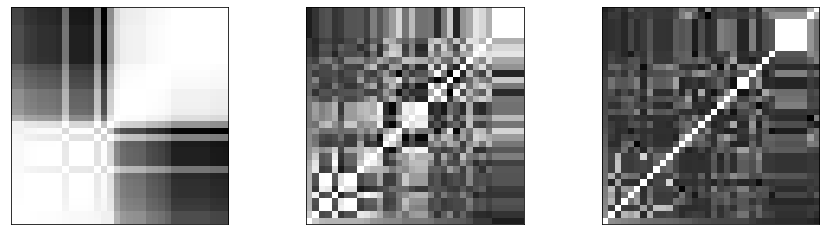

In [33]:
f = plt.figure(figsize=(15,4))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
x_ticks = [str(x) for x in P22]
ax.imshow(c22, interpolation = "nearest",cmap = "gray",origin = "lower")
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(x_ticks)
#ax.set_xticklabels(x_ticks)

x_ticks = [str(x) for x in P26]
ax2.imshow(c26, interpolation = "nearest",cmap = "gray",origin = "lower")
ax2.set_xticks([])
ax2.set_yticks([])
#ax2.set_yticklabels(x_ticks)
#ax2.set_xticklabels(x_ticks)

x_ticks = [str(x) for x in P234]
ax3.imshow(c234, interpolation = "nearest",cmap = "gray", origin = "lower")
ax3.set_xticks([])
ax3.set_yticks([])
# ax3.set_yticklabels(x_ticks)
# ax3.set_xticklabels(x_ticks)
plt.savefig("Community_fig3.png", dpi = 300)

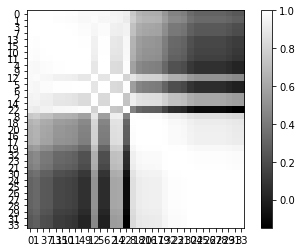

In [36]:
#clustering using LLT
LLT = np.dot(L, L.T)
w, v = linalg.eig(LLT)
w_LLT, v_LLT = return_sorted_wv(w,v)
k = 2
ve = k_reduced_matrix(w_LLT, v_LLT, k)
#print ve.shape
c, P2 = reordered_matrix(cos_similarity(ve))
plt.figure()
x_ticks = [str(x) for x in P2]
plt.imshow(c, interpolation = "nearest",cmap = "gray")
plt.yticks(range(len(x_ticks)),x_ticks)
plt.xticks(range(len(x_ticks)),x_ticks)
plt.colorbar()

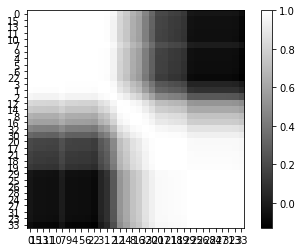

In [38]:
U_L1A, sig_L1A, V_L1A = linalg.svd(L1_appx, full_matrices = True)
IA = np.zeros(len(U_L1A))
for i in range(len(sig_L1A)):
    IA[i] = np.sqrt(sig_L1A[i])
SIG_L1A = np.diag(IA)
v_redA = U_L1A
e_redA = SIG_L1A
veA = np.dot(v_redA[:, 0:k],e_redA[0:k, 0:k])
#w, v = linalg.eig(L1L1T)
#w_L1L1T, v_L1L1T = return_sorted_wv(w,v)
#ve = k_reduced_matrix(w_L1L1T, v_L1L1T)
#print veA.shape
cA, P2A = reordered_matrix(cos_similarity(veA))
plt.figure()
x_ticks = [str(x) for x in P2A]
plt.imshow(cA, interpolation = "nearest",cmap = "gray")
plt.yticks(range(len(x_ticks)),x_ticks)
plt.xticks(range(len(x_ticks)),x_ticks)
plt.colorbar()

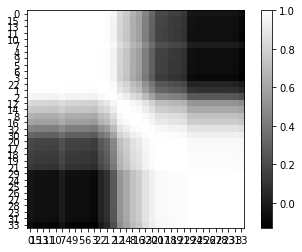

In [39]:
IA1 = np.zeros(len(U_Aq.T))
sig_Aq = sig_A[0:q]
for i in range(len(sig_Aq)):
    IA1[i] = np.sqrt(sig_Aq[i])
SIG_L1A1 = np.diag(IA1)
v_redA1 = U_Aq
e_redA1 = SIG_L1A1
veA1 = np.dot(v_redA1[:, 0:k],e_redA1[0:k, 0:k])
#w, v = linalg.eig(L1L1T)
#w_L1L1T, v_L1L1T = return_sorted_wv(w,v)
#ve = k_reduced_matrix(w_L1L1T, v_L1L1T)
#print veA1.shape
cA1, P2A1 = reordered_matrix(cos_similarity(veA1))
plt.figure()
x_ticks = [str(x) for x in P2A1]
plt.imshow(cA, interpolation = "nearest",cmap = "gray")
plt.yticks(range(len(x_ticks)),x_ticks)
plt.xticks(range(len(x_ticks)),x_ticks)
plt.colorbar()

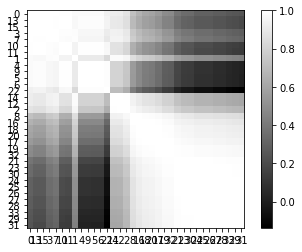

In [41]:
#clustering using L1L1T
q = 20
U_A, sig_A, V_A = linalg.svd(A, full_matrices = False)
UA_nq, SigA_nq, A_new_q, A_new, P1 = det_subset_selection(A, V_A.T, q)
L1L1T = np.dot(A_new_q, A_new_q.T)
w, v = linalg.eig(L1L1T)
w_L1L1T, v_L1L1T = return_sorted_wv(w,v)
ve = k_reduced_matrix(w_L1L1T, v_L1L1T, k)
#print ve.shape
c, P2 = reordered_matrix(cos_similarity(ve))
plt.figure()
x_ticks = [str(x) for x in P2]
plt.imshow(c, interpolation = "nearest",cmap = "gray")
plt.yticks(range(len(x_ticks)),x_ticks)
plt.xticks(range(len(x_ticks)),x_ticks)
plt.colorbar()